In [7]:
import ast
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/data/df_train2.csv')
df_anot = pd.read_csv('/data/train_annotations.csv')
df_bifurcation = pd.read_csv('/data/additional/RANZCR_CLiP_tracheal_bifurcation.csv')

In [6]:
df_bifurcation.tracheal_bifurcation[0]

array('[850, 989]', dtype='<U10')

In [8]:
normal_uid = df.loc[df['ETT - Normal']==1,'StudyInstanceUID'].tolist()
abnormal_uid = df.loc[df['ETT - Abnormal']==1,'StudyInstanceUID'].tolist()

In [41]:
# def plot_xray(StudyInstanceUID, label):
#     """
#     intubation as green
#     bifurcation as red
#     """
#     img = cv2.imread('/data/train/'+StudyInstanceUID+'.jpg')
#     bifurcation = ast.literal_eval(df_bifurcation.loc[df_bifurcation.StudyInstanceUID==StudyInstanceUID,'tracheal_bifurcation'].values[0])
#     intubation = ast.literal_eval(df_anot.loc[(df_anot.StudyInstanceUID==StudyInstanceUID) & (df_anot.label==label),'data'].values[0])[0]
#     img = cv2.circle(img, tuple(bifurcation), 50, (255,0,0), 10)
#     img = cv2.circle(img, tuple(intubation), 50, (0,255,0), 10)
#     plt.figure(figsize=(12,12))
#     plt.imshow(img)

def plot_xray(StudyInstanceUID, label):
    """
    intubation as green
    bifurcation as red
    """
    img = cv2.imread('/data/train/'+StudyInstanceUID+'.jpg')
    bifurcation = ast.literal_eval(df_bifurcation.loc[df_bifurcation.StudyInstanceUID==StudyInstanceUID,'tracheal_bifurcation'].values[0])
    intubation = ast.literal_eval(df_anot.loc[(df_anot.StudyInstanceUID==StudyInstanceUID) & (df_anot.label==label),'data'].values[0])
    img = cv2.circle(img, tuple(bifurcation), 50, (255,0,0), 10)
    for i in range(len(intubation)):
        img = cv2.circle(img, tuple(intubation[i]), 50, (0,255,0), 10)
    plt.figure(figsize=(12,12))
    plt.imshow(img)

1.2.826.0.1.3680043.8.498.11707076266253086830850990314496191758
1.2.826.0.1.3680043.8.498.17332833449968516367349904809269946843
1.2.826.0.1.3680043.8.498.10129559062963528496643969105849375477
1.2.826.0.1.3680043.8.498.43104496908194932746081407360765828791
1.2.826.0.1.3680043.8.498.87968736412284167943497055858764536058
1.2.826.0.1.3680043.8.498.90690902638236229941594899939324151157


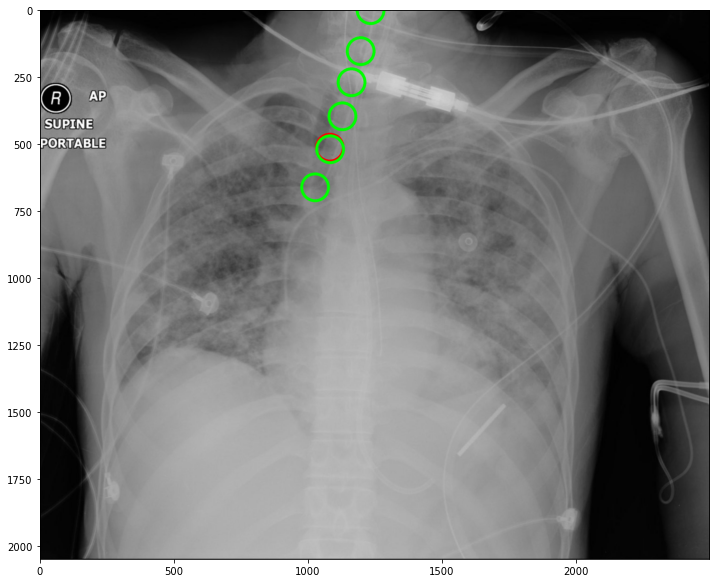

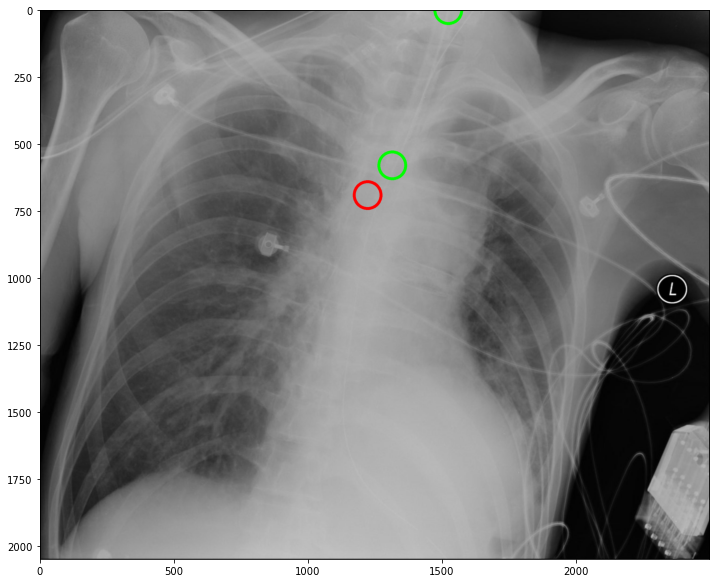

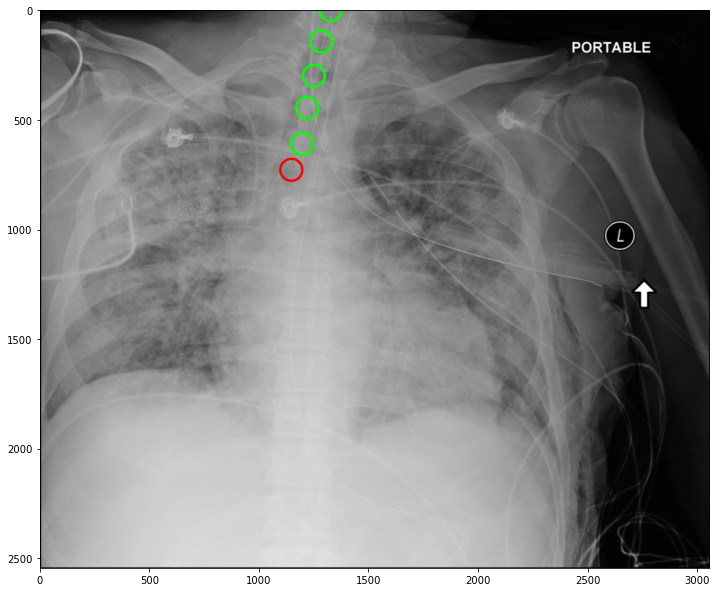

In [42]:
for i in range(1, 10):# bifurcation detected correctly
    try:
        plot_xray(normal_uid[i],'ETT - Normal')
    except:
        print(normal_uid[i])

1.2.826.0.1.3680043.8.498.11707076266253086830850990314496191758
1.2.826.0.1.3680043.8.498.17332833449968516367349904809269946843
1.2.826.0.1.3680043.8.498.21553435248897151659092231631371824902
1.2.826.0.1.3680043.8.498.10129559062963528496643969105849375477
1.2.826.0.1.3680043.8.498.43104496908194932746081407360765828791
1.2.826.0.1.3680043.8.498.87968736412284167943497055858764536058
1.2.826.0.1.3680043.8.498.90690902638236229941594899939324151157


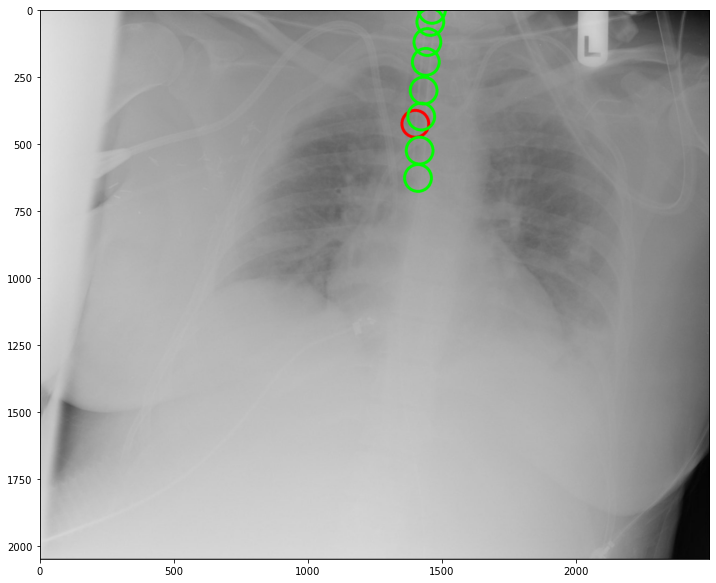

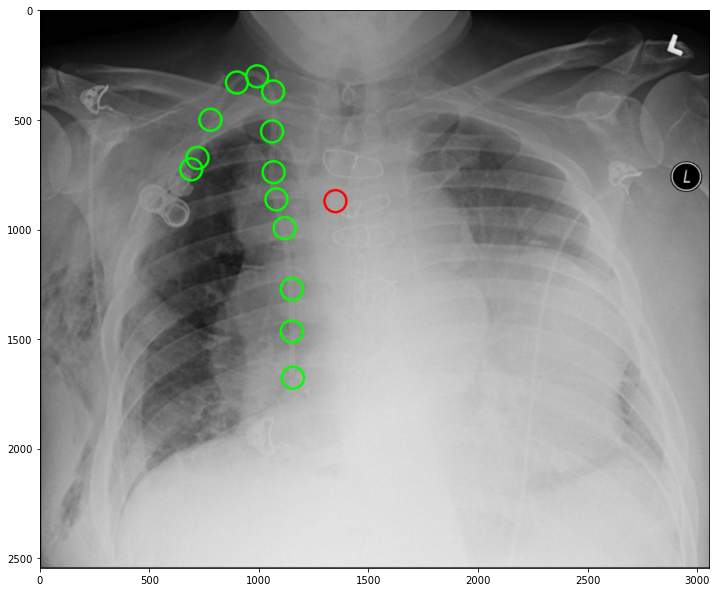

In [43]:
for i in range(1, 10):# bifurcation detected correctly
    try:
        plot_xray(abnormal_uid[i],'ETT - Abnormal')
    except:
        print(normal_uid[i])

In [37]:
normal_uid[0]

'1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729'

In [19]:
StudyInstanceUID = normal_uid[9]
bifurcation = ast.literal_eval(df_bifurcation.loc[df_bifurcation.StudyInstanceUID==StudyInstanceUID,'tracheal_bifurcation'].values[0])

In [16]:
bifurcation

[1146, 728]

In [17]:
df_bifurcation.loc[df_bifurcation.StudyInstanceUID==StudyInstanceUID,'tracheal_bifurcation'].values

array(['[1146, 728]'], dtype=object)

In [21]:
label = 'ETT - Normal'
intubation = ast.literal_eval(df_anot.loc[(df_anot.StudyInstanceUID==StudyInstanceUID) & (df_anot.label==label),'data'].values[0])[0]

In [23]:
intubation = ast.literal_eval(df_anot.loc[(df_anot.StudyInstanceUID==StudyInstanceUID) & (df_anot.label==label),'data'].values[0])

In [26]:
df_anot.StudyInstanceUID.value_counts()

1.2.826.0.1.3680043.8.498.11693509889426445054876979814173446281    6
1.2.826.0.1.3680043.8.498.11881912214252557846819720135643941063    6
1.2.826.0.1.3680043.8.498.39534469843299454267464050408290558970    6
1.2.826.0.1.3680043.8.498.27397978914082160028081958789957830153    6
1.2.826.0.1.3680043.8.498.60320308292885951875346769748781095221    6
                                                                   ..
1.2.826.0.1.3680043.8.498.11416194072097895719188143311543201790    1
1.2.826.0.1.3680043.8.498.11628817395326230048676934953074521231    1
1.2.826.0.1.3680043.8.498.56142178873475955295432829739591536650    1
1.2.826.0.1.3680043.8.498.11461166821262935320163336144988046037    1
1.2.826.0.1.3680043.8.498.11625185422537463703077320301849944612    1
Name: StudyInstanceUID, Length: 9095, dtype: int64

In [27]:
df_anot

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."
...,...,...,...
17994,1.2.826.0.1.3680043.8.498.18590666552942008211...,ETT - Normal,"[[1489, 631], [1515, 571], [1563, 535], [1596,..."
17995,1.2.826.0.1.3680043.8.498.18590666552942008211...,CVC - Normal,"[[1250, 1105], [1247, 1031], [1248, 970], [126..."
17996,1.2.826.0.1.3680043.8.498.66774579023475418162...,CVC - Normal,"[[1379, 1402], [1389, 1233], [1386, 1137], [13..."
17997,1.2.826.0.1.3680043.8.498.18560506324214035535...,CVC - Normal,"[[1302, 1543], [1308, 1488], [1317, 1355], [13..."


In [28]:
df_anot[df_anot.StudyInstanceUID == "1.2.826.0.1.3680043.8.498.11693509889426445054876979814173446281"]

,StudyInstanceUID,label,data
3276,1.2.826.0.1.3680043.8.498.11693509889426445054...,ETT - Normal,"[[1242, 632], [1287, 525], [1318, 576]]"
3277,1.2.826.0.1.3680043.8.498.11693509889426445054...,CVC - Borderline,"[[2338, 851], [2354, 920], [2382, 1029], [2406..."
3278,1.2.826.0.1.3680043.8.498.11693509889426445054...,NGT - Incompletely Imaged,"[[1449, 10], [1420, 151], [1377, 302], [1323, ..."
3279,1.2.826.0.1.3680043.8.498.11693509889426445054...,NGT - Incompletely Imaged,"[[1525, 2039], [1390, 1861], [1343, 1776], [13..."
3280,1.2.826.0.1.3680043.8.498.11693509889426445054...,CVC - Borderline,"[[990, 1265], [986, 1126], [1012, 1012], [1035..."
3281,1.2.826.0.1.3680043.8.498.11693509889426445054...,CVC - Borderline,"[[968, 1207], [970, 1111], [986, 1035], [1003,..."


<AxesSubplot:>

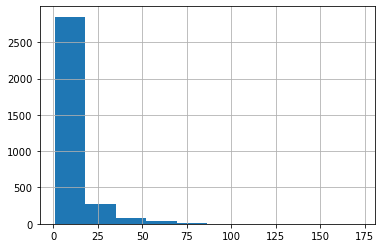

In [46]:
df.PatientID.value_counts().hist()

In [49]:
df.PatientID.value_counts()

05029c63a    172
55073fece    167
26da0d5ad    148
8849382d0    130
34242119f    110
            ... 
424f0eb19      1
2f61c7d65      1
a5c1531fd      1
17cb03288      1
d1fa71884      1
Name: PatientID, Length: 3255, dtype: int64